In [55]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [56]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [57]:
X_train=X_train/255
X_test=X_test/255
X_train.shape

(60000, 28, 28)

In [58]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [59]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid',name='L2')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8714 - loss: 0.4532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9633 - loss: 0.1260
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9752 - loss: 0.0843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0650
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0504


In [12]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0924 - loss: 213800.6562


[224386.453125, 0.09799999743700027]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

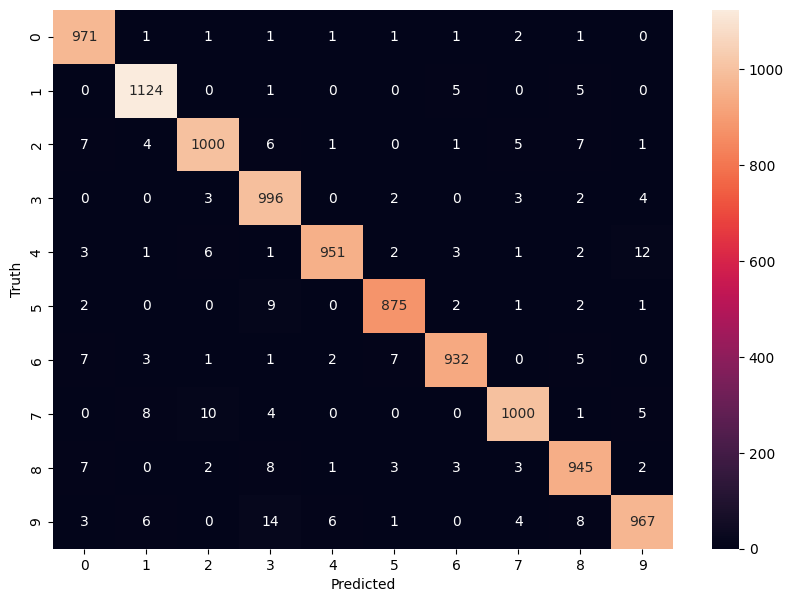

In [61]:
import seaborn as sn
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
